# Machine Learning

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 2.01 s (started: 2024-04-24 20:00:18 +00:00)


In [ ]:
 !pip install ipython-autotime
 %load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 7.84 s (started: 2024-04-24 20:00:20 +00:00)


### Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from gensim.models import KeyedVectors
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from transformers import BertModel, BertTokenizer, DistilBertModel, DistilBertTokenizer, AutoTokenizer, ElectraModel
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

import scipy
import itertools
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


time: 11 s (started: 2024-04-24 20:13:08 +00:00)


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

time: 70.1 ms (started: 2024-04-24 20:00:28 +00:00)


### Dataset

In [ ]:
dataset_path = '../Data/dataset_4.csv'
df = pd.read_csv(dataset_path)

time: 2.19 s (started: 2024-04-24 20:00:28 +00:00)


In [ ]:
dataset = df[~df['author_id'].isin([69, 251, 53])]

time: 3.22 ms (started: 2024-04-24 20:00:31 +00:00)


In [ ]:
dataset.head()

,author_id,text
0,168,"Mr. Alger's stories are pure in tone, inspirin..."
1,168,"""I'll tell you what I think will be a good inv..."
2,168,"She was tall, inclined to be slender, with a k..."
3,168,"One day he went into Kinsley's restaurant, on ..."
4,168,"The telegram sent, our hero went with Mr. Ball..."


time: 489 ms (started: 2024-04-24 20:00:31 +00:00)


In [ ]:
nan_values = dataset.isnull().sum()
nan_values

author_id     0
text         14
dtype: int64

time: 6.52 ms (started: 2024-04-24 20:00:31 +00:00)


In [ ]:
 dataset = dataset.dropna()

time: 2.59 ms (started: 2024-04-24 20:00:31 +00:00)


<Axes: xlabel='author_id', ylabel='count'>

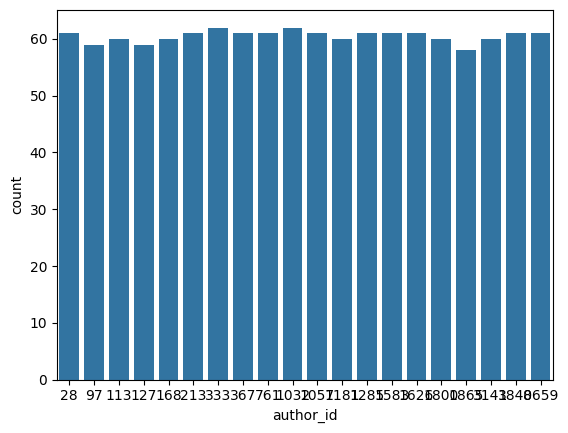

time: 557 ms (started: 2024-04-24 20:00:31 +00:00)


In [ ]:
sns.countplot(x='author_id', data=dataset)

### Preprocessing

In [ ]:
def preprocess_text(text):
    # Odstránenie non-ASCII znakov
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    # Odstránenie čísel
    text = re.sub(r'\d+', '', text)
    # Odstránenie interpunkcie
    text = re.sub(r'[^\w\s]', '', text)
    # Prevod na malé písmena
    text = text.lower()
    # Odstránenie stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    # Lemmatizácia
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return ' '.join(lemmatized_words)


time: 1.1 ms (started: 2024-04-24 20:00:32 +00:00)


In [ ]:
dataset['processed_text'] = dataset['text'].apply(preprocess_text)

time: 2min 46s (started: 2024-04-24 20:00:32 +00:00)


In [ ]:
dataset.head()

,author_id,text,processed_text
0,168,"Mr. Alger's stories are pure in tone, inspirin...",mr alger story pure tone inspiring influence p...
1,168,"""I'll tell you what I think will be a good inv...",ill tell think good investment said mr murdock...
2,168,"She was tall, inclined to be slender, with a k...",tall inclined slender keen face singular eye n...
3,168,"One day he went into Kinsley's restaurant, on ...",one day went kinsleys restaurant adam street f...
4,168,"The telegram sent, our hero went with Mr. Ball...",telegram sent hero went mr ball latter house l...


time: 1.59 s (started: 2024-04-24 20:03:19 +00:00)


### Rozdelenie dát na test / train data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset.processed_text, dataset.author_id, test_size=0.20, random_state=13, stratify=dataset.author_id)

time: 7.21 ms (started: 2024-04-24 20:03:20 +00:00)


In [ ]:
print('Train')
print(y_train.value_counts())
print('Test')
print(y_test.value_counts())

Train
author_id
213     49
367     49
1583    49
1285    49
333     49
761     49
3840    49
1626    49
28      49
1032    49
1057    49
8659    49
3141    48
168     48
1181    48
113     48
1800    48
127     47
97      47
1865    46
Name: count, dtype: int64
Test
author_id
333     13
1032    13
97      12
8659    12
28      12
1865    12
1181    12
3141    12
3840    12
367     12
113     12
127     12
1626    12
761     12
1057    12
168     12
1285    12
1800    12
213     12
1583    12
Name: count, dtype: int64
time: 10.7 ms (started: 2024-04-24 20:03:20 +00:00)


## Vektorizácia

## Bag of Words


In [ ]:
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

time: 11.8 s (started: 2024-04-24 20:03:20 +00:00)


### Logistická regresia

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

model.fit(X_train_vect, y_train)

y_pred = model.predict(X_test_vect)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9421487603305785
F1 score: 0.9422239420658394
Precision: 0.9441219937087706
Recall: 0.9421487603305785
Confusion Matrix:
 [[11  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0]
 [ 0  1 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  0  0 10  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 12  0 

### Naive-Bayes

In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_vect, y_train)

predicted_labels = classifier.predict(X_test_vect)

test_accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))


Accuracy: 0.8388429752066116
F1 score: 0.8023169631753374
Precision: 0.8030570207304656
Recall: 0.8388429752066116
Confusion Matrix:
 [[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  9  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  1  7  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 12  0 

## TF - IDF

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

time: 14.6 s (started: 2024-04-24 20:04:22 +00:00)


### Logistická regresia

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9545454545454546
F1 score: 0.9535899564150032
Precision: 0.9602352193261284
Recall: 0.9545454545454546
Confusion Matrix:
 [[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 12  0 

### Naive-Bayes

In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_tfidf, y_train)

predicted_labels = classifier.predict(X_test_tfidf)

test_accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))


Accuracy: 0.7727272727272727
F1 score: 0.7660323573460252
Precision: 0.8342954661136479
Recall: 0.7727272727272727
Confusion Matrix:
 [[ 8  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  1  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  4  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  1  1  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  8  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  1  0  0  0  0  0  0  0  3  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  1  0  0  5  0  0  0  0  1  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 12  0 

## GloVe


In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec

glove_input_file = '/content/drive/MyDrive/glove.6B.300d.txt'
word2vec_output_file = 'glove.6B.300d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)


<ipython-input-41-5c75194aba4b>:5: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


(400000, 300)

time: 3min 2s (started: 2024-04-24 20:04:52 +00:00)


In [ ]:
import numpy as np
from gensim.models import KeyedVectors

glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

def document_vector(doc):
    words = doc.split()
    valid_words = [word for word in words if word in glove_model.key_to_index]
    if not valid_words:
        return np.zeros(glove_model.vector_size)
    doc_embedding = np.mean(glove_model[valid_words], axis=0)
    return doc_embedding

processed_texts = dataset['processed_text'].tolist()

embedding_matrix = np.array([document_vector(doc) for doc in processed_texts])


time: 2min 24s (started: 2024-04-24 20:07:54 +00:00)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

labels = dataset['author_id'].tolist()

X_train, X_test, y_train, y_test = train_test_split(embedding_matrix, labels, test_size=0.2, random_state=42)


time: 3.35 ms (started: 2024-04-24 20:10:19 +00:00)


In [ ]:
print(X_train)
print(y_train)

[[-0.07138173  0.05818608 -0.06713643 ... -0.07116736 -0.05083557
   0.09032188]
 [-0.06881977  0.00998818 -0.02150472 ... -0.05839831 -0.04298137
   0.02870026]
 [-0.09611292 -0.0066167  -0.02084159 ... -0.05026534 -0.06634399
   0.11353296]
 ...
 [-0.09657022  0.0410522  -0.05515845 ... -0.03510905 -0.10139527
   0.10500239]
 [-0.07294028 -0.05575493  0.00025424 ... -0.09361756 -0.12626758
   0.16291155]
 [-0.08809318  0.02431849 -0.06218516 ... -0.06433736 -0.04404177
   0.09005374]]
[1626, 333, 213, 3840, 1181, 1181, 3840, 1285, 8659, 1285, 1285, 1865, 1057, 367, 8659, 3840, 28, 1285, 28, 1181, 1285, 1057, 3840, 1057, 28, 1583, 1583, 1057, 113, 1181, 1800, 8659, 1032, 3840, 333, 113, 127, 3840, 367, 333, 761, 367, 213, 8659, 97, 333, 8659, 3141, 213, 8659, 168, 168, 1032, 127, 1057, 213, 97, 168, 1285, 367, 3141, 97, 97, 761, 213, 127, 333, 1583, 168, 1865, 3141, 213, 3141, 97, 3840, 761, 1181, 1800, 97, 1285, 367, 367, 1865, 1865, 113, 1800, 168, 761, 367, 1032, 127, 761, 3141, 12

### Logistická regresia

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8181818181818182
F1 score: 0.8162316707209235
Precision: 0.8420168438216566
Recall: 0.8181818181818182
Confusion Matrix:
 [[10  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  1  0  0]
 [ 1  4  3  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 1  1  8  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  4  1  0  6  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  1  1]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  1  0  0  0 12  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 0  1  1  1  0  0  0  0  0  0  0  0  8  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 13  0 

### Naive-Bayes

In [ ]:

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

time: 14.6 ms (started: 2024-04-24 20:10:20 +00:00)


In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_scaled, y_train)

predicted_labels = classifier.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))

Accuracy: 0.7892561983471075
F1 score: 0.7875016467017716
Precision: 0.8053258522388321
Recall: 0.7892561983471075
Confusion Matrix:
 [[11  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  6  1  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 1  1  8  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  1  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  0  0  9  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  1  1]
 [ 0  0  0  0  0  0  0  6  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  1  2]
 [ 0  0  0  0  0  0  1  0  0  0 12  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  1  0  0  0  6  0  0  1  0  1  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 13  0 

## Word2Vec

In [ ]:
model_path = '../Data/GoogleNews-vectors-negative300.bin'
w2v_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

time: 1min 13s (started: 2024-04-24 20:10:20 +00:00)


In [ ]:
def document_vector(model, doc):
    words = doc.split()
    valid_words = [word for word in words if word in model.key_to_index]
    if not valid_words:
        return np.zeros(model.vector_size)
    return np.mean(model[valid_words], axis=0)


time: 577 µs (started: 2024-04-24 20:11:34 +00:00)


In [ ]:
document_vectors = np.array([document_vector(w2v_model, doc) for doc in dataset['processed_text']])

time: 47 s (started: 2024-04-24 20:11:34 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(document_vectors, dataset['author_id'], test_size=0.2, random_state=42)

time: 3.83 ms (started: 2024-04-24 20:12:21 +00:00)


### Logistická regresia

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.743801652892562
F1 score: 0.7299130709736311
Precision: 0.828098766718275
Recall: 0.743801652892562
Confusion Matrix:
 [[11  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 1  1  6  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0]
 [ 1  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 1  0  1  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  5  0  0  2  0  0  1  0  0  2  0  1  1  0  1  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  1  1]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0 10  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  1  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0 11  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 1  0  2  0  0  0  0  1  1  0  0  0  5  0  1  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 13  0  0 

### Naive-Bayes

In [ ]:

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

time: 7.81 ms (started: 2024-04-24 20:12:21 +00:00)


In [ ]:
X_train_scaled

array([[0.6209785 , 0.7291662 , 0.52775013, ..., 0.43859178, 0.68999124,
        0.21824965],
       [0.6908849 , 0.6028336 , 0.537315  , ..., 0.53863424, 0.54464495,
        0.33996218],
       [0.6894319 , 0.7021772 , 0.7425801 , ..., 0.31394255, 0.71438944,
        0.36479706],
       ...,
       [0.46871752, 0.40938318, 0.54853415, ..., 0.30179954, 0.52699673,
        0.32773834],
       [0.3262862 , 0.5131371 , 0.4879775 , ..., 0.16101253, 0.76487035,
        0.36211374],
       [0.6303506 , 0.46996915, 0.6958482 , ..., 0.42125887, 0.33931202,
        0.3356341 ]], dtype=float32)

time: 9.24 ms (started: 2024-04-24 20:12:21 +00:00)


In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_scaled, y_train)

predicted_labels = classifier.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))

Accuracy: 0.8057851239669421
F1 score: 0.804286257531639
Precision: 0.8267603198116464
Recall: 0.8057851239669421
Confusion Matrix:
 [[10  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  1  0  0]
 [ 1  7  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 1  1  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 1  1  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  2  0  0  9  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  1  1]
 [ 0  0  0  0  0  0  0  6  0  1  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  1  0  0  0 12  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  1  0  0  1  0  1  0  7  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 13  0  

## Bert

In [ ]:
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

def bert_encode(document, tokenizer, model):
    inputs = tokenizer(document, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[:, 0, :].detach().numpy()
    return embeddings



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

time: 10.4 s (started: 2024-04-24 20:13:19 +00:00)


In [ ]:
documents = dataset['processed_text']
labels = dataset['author_id']

embeddings = np.vstack([bert_encode(doc, tokenizer, model) for doc in documents])

time: 47min 27s (started: 2024-04-24 20:13:30 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2)

time: 3.01 ms (started: 2024-04-24 21:00:57 +00:00)


### Logistická regresia

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7231404958677686
F1 score: 0.7223384727497622
Precision: 0.7400429369818236
Recall: 0.7231404958677686
Confusion Matrix:
 [[ 9  0  1  0  0  1  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  2  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  9  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  1  0 12  0  0  0  0  2  1  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0]
 [ 0  0  1  0  0  7  0  0  0  0  0  0  1  0  0  0  1  0  1  0]
 [ 0  1  0  0  0  1  7  0  0  0  1  0  0  0  0  0  0  0  2  2]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  9  0  0  0  1  0  0  0  1  0  2]
 [ 0  0  0  0  0  0  0  0  0  1  6  0  0  0  1  1  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  0  1  0  1  0  5  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0 12  0 

### Naive-Bayes

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

time: 6.62 ms (started: 2024-04-24 21:01:00 +00:00)


In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_scaled, y_train)

predicted_labels = classifier.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))

Accuracy: 0.5909090909090909
F1 score: 0.5882250888367666
Precision: 0.6155575074246208
Recall: 0.5909090909090909
Confusion Matrix:
 [[ 6  1  3  0  0  1  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  2  1  0  0  0  0  0  1  0  0  0  0  0  0  1  1  0  0]
 [ 2  0  7  0  0  0  0  0  1  0  1  0  0  0  0  0  0  1  0  0]
 [ 0  1  0  9  0  0  1  0  1  0  2  0  1  0  0  0  0  0  5  0]
 [ 0  0  0  0  5  0  0  1  0  1  1  0  0  0  1  0  1  0  0  0]
 [ 1  1  2  0  0  4  0  0  1  0  1  0  0  0  0  0  0  0  1  0]
 [ 1  0  2  0  0  1  6  1  0  0  1  0  0  0  0  0  0  0  0  2]
 [ 0  0  1  0  0  0  0  7  0  0  0  0  0  0  1  0  0  0  0  1]
 [ 0  0  1  0  0  0  0  0  8  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  8  0  0  0  2  0  0  0  0  0  4]
 [ 0  0  0  0  0  0  0  0  0  1  6  0  0  0  0  1  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  1  0  1  0  1  1  0  1  0  0  0  3  0  0  0  1  0  0  1]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0 12  0 

## DistilBert

In [ ]:
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertModel.from_pretrained(model_name)

def bert_encode(document, tokenizer, model):
    inputs = tokenizer(document, max_length=512, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[:, 0, :].detach().numpy()
    return embeddings



tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

time: 5.22 s (started: 2024-04-24 21:01:00 +00:00)


In [ ]:
documents = dataset['processed_text']
labels = dataset['author_id']

embeddings = np.vstack([bert_encode(doc, tokenizer, model) for doc in documents])

time: 27min 22s (started: 2024-04-24 21:01:05 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2)

time: 15.3 ms (started: 2024-04-24 21:28:28 +00:00)


### Logistická regresia

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7727272727272727
F1 score: 0.7699173178077425
Precision: 0.777541605750162
Recall: 0.7727272727272727
Confusion Matrix:
 [[ 6  0  0  0  1  0  2  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 10  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  1  0  0  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  1  1 11  0  1  0  0  0  0  0  1  0  0  0  2  0  0  1  0]
 [ 0  0  1  0  8  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 1  1  1  0  0  9  0  1  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 1  0  0  3  0  0  8  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  6  0  0  0  0  1  0  0  0  1  0  0]
 [ 0  0  0  1  0  0  0  0  0 13  0  0  0  0  2  0  0  0  0  1]
 [ 1  0  0  0  0  0  0  0  1  0 10  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 13  1  0  0  0  0  0  0  0]
 [ 1  1  0  1  0  0  0  0  0  0  0  0  7  0  0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  7  0  

### Naive-Bayes

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

time: 5.9 ms (started: 2024-04-24 21:28:30 +00:00)


In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_scaled, y_train)

predicted_labels = classifier.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))

Accuracy: 0.6198347107438017
F1 score: 0.6096472499327694
Precision: 0.6326169704105763
Recall: 0.6198347107438017
Confusion Matrix:
 [[ 5  1  0  1  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  1  0  0  0  0  0  0  1  0  0  1  0  1  1  0  0  0]
 [ 0  1 10  0  0  1  0  0  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 2  0  1  8  0  1  0  0  0  0  1  1  2  0  0  0  0  0  2  0]
 [ 0  0  1  0  3  2  0  0  0  0  0  0  0  0  4  0  1  0  0  0]
 [ 0  1  3  0  0  6  0  0  0  0  0  2  0  1  0  0  0  2  0  0]
 [ 0  1  2  0  0  0  7  0  0  0  1  0  1  0  0  0  0  0  1  1]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  1  0  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  6  0  0  0  0  1  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  1  0  2  0  0  0  0  2]
 [ 0  0  1  0  0  1  1  0  1  0  8  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 13  1  0  0  0  0  0  0  0]
 [ 0  1  1  2  0  0  0  0  0  0  1  0  3  1  0  2  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  7  0 

time: 42.5 ms (started: 2024-04-24 21:28:30 +00:00)


## Electra

In [ ]:
model_name = 'google/electra-small-discriminator'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = ElectraModel.from_pretrained(model_name)

def electra_encode(document, tokenizer, model):
    inputs = tokenizer(document, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[:, 0, :].detach().numpy()
    return embeddings



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

time: 3.91 s (started: 2024-04-24 21:28:30 +00:00)


In [ ]:
documents = dataset['processed_text']
labels = dataset['author_id']

embeddings = np.vstack([electra_encode(doc, tokenizer, model) for doc in documents])

time: 8min 15s (started: 2024-04-24 21:28:34 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2)

time: 2.47 ms (started: 2024-04-24 21:36:50 +00:00)


### Logistická regresia

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6570247933884298
F1 score: 0.6561426483270407
Precision: 0.6686155816538591
Recall: 0.6570247933884298
Confusion Matrix:
 [[ 8  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 2  7  1  0  1  1  0  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 2  3  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  5  0  0  1  1  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0]
 [ 0  1  0  0  1  6  1  0  0  0  1  0  0  0  0  1  0  1  0  0]
 [ 0  0  0  2  0  0 13  0  0  0  0  0  0  1  0  1  0  1  1  0]
 [ 0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  1  1  0  1  0  0  3  0  1  0  0  1  0  1  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  6  0  0  0  1  0  0  0  1  0  1]
 [ 0  0  0  0  0  0  0  0  0  0 13  0  1  0  0  1  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  2  0  0  0  0  5  0  0  0  0  2  1  1]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0 15  0 

### Naive-Bayes

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

time: 5.34 ms (started: 2024-04-24 21:36:51 +00:00)


In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_scaled, y_train)

predicted_labels = classifier.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted')

print('Accuracy:', test_accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))

Accuracy: 0.3512396694214876
F1 score: 0.3399519309430387
Precision: 0.40566381020094905
Recall: 0.3512396694214876
Confusion Matrix:
 [[ 4  1  0  1  2  0  0  0  0  0  1  0  0  1  0  0  0  1  0  0]
 [ 2  1  0  0  4  0  0  1  0  2  0  0  0  1  0  1  0  1  1  0]
 [ 1  0  4  1  2  0  0  0  0  0  0  1  0  0  1  0  0  1  0  0]
 [ 1  0  1  1  1  1  0  1  1  0  1  0  0  0  0  0  0  0  0  1]
 [ 0  0  1  0  5  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  5  0  0  0  0  0  0  0  0  0  2  0  1  0  2]
 [ 0  0  3  5  0  0  3  1  3  1  0  0  1  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  1  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  3  0  0  0  0  0  2  0  0  0  1  0  0  1  0  1  0  1]
 [ 0  0  0  0  2  0  0  0  0  2  0  0  0  0  1  0  0  1  0  4]
 [ 0  0  0  2  1  2  0  1  0  1  5  0  0  1  1  1  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0]
 [ 0  1  0  2  0  0  0  1  0  0  0  1  3  0  0  0  1  2  1  0]
 [ 0  0  0  0  0  0  0  0  4  0  0  0  0 11  0

time: 64.8 ms (started: 2024-04-24 21:36:51 +00:00)
